# Logistic Regression

<h3>Python Initialization</h3> 

First, initialize the environment:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Next, let's simulate some 2D data with binary (0/1) labels.

In [2]:
np.random.seed(12)
n_samples = 500

class_one = np.random.multivariate_normal([5, 10], [[1, 0.25], [0.25, 1]], n_samples)
class_one_labels = -np.ones(n_samples)

class_two = np.random.multivariate_normal([0, 5], [[1, 0.25], [0.25, 1]], n_samples)
class_two_labels = np.ones(n_samples)

features = np.vstack((class_one, class_two))
labels = np.hstack((class_one_labels, class_two_labels))

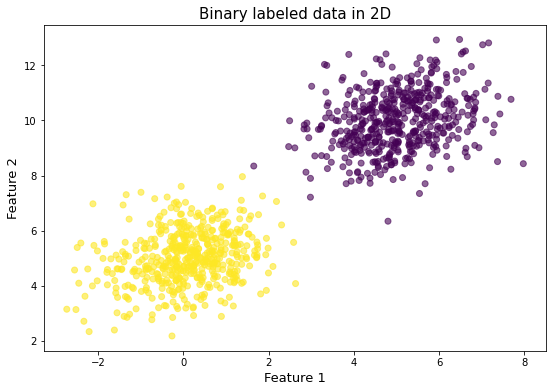

In [3]:
# We can visualize these data distributions
plt.figure(figsize=(9, 6))
plt.scatter(features[:, 0], features[:, 1], c=labels, alpha=0.6)

plt.title("Binary labeled data in 2D", size=15)
plt.xlabel("Feature 1", size=13)
plt.ylabel("Feature 2", size=13);

<h2>Gradient Descent and Email Spam Classification</h2>

<h3>Part One: Sigmoid</h3>

<p>First let's implement the sigmoid function: $\sigma(z)=\frac{1}{1+e^{-z}}$</p>

In [4]:
def sigmoid(z):
    """This function computes the sigmoid σ(z) for a given value."""
    return 1 / (1 + np.exp(-z))

<h3>Part Two: Implement <code>y_pred</code></h3>

<p>We consider binary logistic regression with class labels $y\in\{+1,-1\}$. The function <code>y_pred(X,w)</code> computes $P(y=1\;|\;\mathbf{x};\mathbf{w}, b)$ for each row-vector $\mathbf{x}$ in the matrix <code>X</code>.</p>

<p>Recall that:
$$P(y\;|\;\mathbf{x};\mathbf{w})=\sigma(y (\mathbf{w}^\top \mathbf{x} + b))$$
</p>

In [5]:
def y_pred(X, w, b=0):
    """This function acts as a binary logistic regression predictor."""
    n, d = X.shape
    prob = np.zeros(n)
    for i in range(n):
        x = X[i, :]
        prob[i] = sigmoid(np.dot(x, w) + b)

    return prob

<h3>Part Three: Implement <code>log_loss</code></h3>

<p>Assume we are given a data set $\mathbf{x}_1,\dots,\mathbf{x}_n$ stored as row-vectors in a matrix <code>X</code> with labels $y_1,\dots,y_n$ stored in vector <code>y</code>. Compute the <b>negative</b> log-likelihood (<code>log_loss</code>) of all inputs

$$
NLL=-\log P(\mathbf{y}\;|\;\mathbf{X};\mathbf{w}, b)=-\sum_{i=1}^n \log\left((P(y_i\;|\; \mathbf{x}_i;\mathbf{w}, b))\right)=-\sum_{i=1}^n \log\left(\sigma(y_i(\mathbf{w}^\top \mathbf{x}_i + b))\right).
$$
</p>

In [6]:
def log_loss(X, y, w, b=0):
    """This function computes the negative log-likelihood for a set of inputs."""
    # check if all labels in y are either +1 or -1
    assert np.sum(np.abs(y)) == len(y)

    return -np.sum(np.log(sigmoid(y * (X @ w + b))))

<h3>Part Four: Compute Gradient</h3>

Now, verify that the gradient of the log-loss with respect to the weight vector is:

$$
\frac{\partial NLL(\mathbf{X},\mathbf{y},\mathbf{w}, b)}{\partial \mathbf{w}}=\sum_{i=1}^n -y_i\sigma(-y_i(\mathbf{w}^\top\mathbf{x}_i + b))\mathbf{x}_i.
$$ 

$$
\frac{\partial NLL(\mathbf{X},\mathbf{y},\mathbf{w}, b)}{\partial b}=\sum_{i=1}^n -y_i\sigma(-y_i(\mathbf{w}^\top\mathbf{x}_i + b)).
$$

Implement the function <code>gradient</code> which returns the first derivative with respect to <code>w, b</code> for a given <code>X, y, w, b</code>.

In [7]:
def gradient(X, y, w, b):
    """This function computes the gradient of the log-loss w.r.t. the weight vector."""
    n, d = X.shape
    wgrad = (-y * sigmoid(-y * (X @ w + b))) @ X
    bgrad = np.sum(-y * sigmoid(-y * (X @ w + b)))

    return wgrad, bgrad

<h3>Part Five: Weight Update of Gradient Ascent</h3>

The code below implements the weight update of gradient descent on the log_loss function.

In [8]:
def logistic_regression(X, y, max_iter, alpha):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    losses = np.zeros(max_iter)

    for step in range(max_iter):
        wgrad, bgrad = gradient(X, y, w, b)
        w -= alpha * wgrad
        b -= alpha * bgrad
        losses[step] = log_loss(X, y, w, b)

    return w, b, losses

<h2>Original Data</h2>

<p>Now let's run the above implementation on the binary classification data from the top of the notebook.</p>

You can tune `max_iter` and `alpha` to see how they affect convergence!

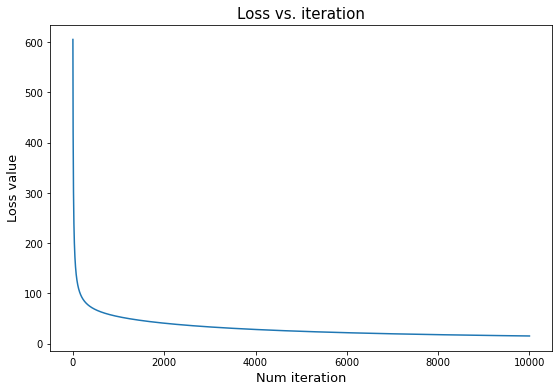

In [9]:
max_iter = 10_000
alpha = 1e-4
final_w, final_b, losses = logistic_regression(features, labels, max_iter, alpha)

plt.figure(figsize=(9, 6))
plt.plot(losses)
plt.title("Loss vs. iteration", size=15)
plt.xlabel("Num iteration", size=13)
plt.ylabel("Loss value", size=13);

Below, we'll take the final weights from the logistic solver and predict labels for the entire dataset. By plotting the results, we can get a sense of where the linear decision boundary lies.

Score: 99.70%


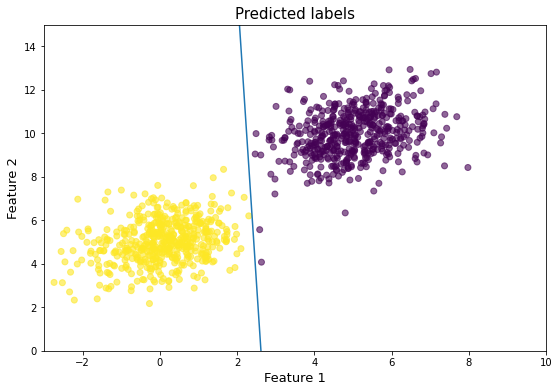

In [10]:
scores = y_pred(features, final_w, final_b)

pred_labels = (scores > 0.5).astype(int)
pred_labels[pred_labels != 1] = -1
print("Score: {:.2%}".format(np.mean(pred_labels == labels)))

plt.figure(figsize=(9, 6))

# plot the decision boundary
x = np.linspace(np.amin(features[:, 0]), np.amax(features[:, 0]), 10)
y = -(final_w[0] * x + final_b) / final_w[1]

plt.plot(x, y)
plt.scatter(features[:, 0], features[:, 1], c=pred_labels, alpha=0.6)
plt.title("Predicted labels", size=15)
plt.xlabel("Feature 1", size=13)
plt.ylabel("Feature 2", size=13)
plt.axis([-3, 10, 0, 15]);